In [1]:
import pandas as pd
# URL of the CSV file
url = 'https://raw.githubusercontent.com/ccm-bioinfo/cambda2023/5b6b94b0e16785deb76ce92814c24bb6d27877ea/06_amr_resistance/data/230705_AMR_mysterious_NCBI_all_nelly.csv'  # Replace with the actual GitHub URL of the CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Print the DataFrame
print(df)




             ID                  Species        City AST-based group  \
0            S1  Enterobacter hormaechei  mysterious   3GC-resistant   
1            S2  Enterobacter hormaechei  mysterious          CP CRE   
2            S3  Enterobacter hormaechei  mysterious          CP CRE   
3            S4  Enterobacter hormaechei  mysterious          CP CRE   
4            S5  Enterobacter hormaechei  mysterious          CP CRE   
..          ...                      ...         ...             ...   
282  SAC_Kl_COA    Klebsiella pneumoniae         SAC               0   
283  SAN_Es_COA         Escherichia coli         SAN               0   
284  SAN_Kl_COA    Klebsiella pneumoniae         SAN               0   
285  MIN_Es_COA         Escherichia coli         MIN               0   
286  SAN_En_COA  Enterobacter hormaechei         SAN               0   

     Collection_date  AAC(3)-IIa_ARO:3002533  AAC(3)-IIc_ARO:3002535  \
0                0.0                     0.0                   

In [2]:
# Getting consensus by city

# Function to calculate mode and concatenate "Species" and "City"
def calculate_mode_and_concatenate(group):
    mode_values = group.mode().iloc[0]
    group['ID'] = f"{group['Species'].iloc[0]}_{group['City'].iloc[0]}"
    return mode_values

# Group by "Species" and "City" columns, apply mode to each other column, and add "ID" column
df_grouped = df.iloc[0:146].groupby(["Species", "City"]).apply(calculate_mode_and_concatenate)

# Reset index to remove the grouped columns from the index
df_grouped.reset_index(drop=True, inplace=True)

# Print the resulting grouped DataFrame
print(df_grouped)

merged_df = pd.concat([df_grouped, df.iloc[147:286]], axis=0)
print(merged_df )

0    ID                  Species        City AST-based group  Collection_date  \
0    S1  Enterobacter hormaechei  mysterious          CP CRE              0.0   
1   S10         Escherichia coli  mysterious          CP CRE              0.0   
2  S100    Klebsiella pneumoniae  mysterious          CP CRE              0.0   

0  AAC(3)-IIa_ARO:3002533  AAC(3)-IIc_ARO:3002535  AAC(6')-Ib-cr7_ARO:3005117  \
0                     0.0                     0.0                         0.0   
1                     0.0                     0.0                         0.0   
2                     0.0                     0.0                         0.0   

0  AAC(6')-Ib-Hangzhou_ARO:3002592  AAC(6')-Ib-Suzhou_ARO:3002591  ...  ybta  \
0                              0.0                            0.0  ...   0.0   
1                              0.0                            0.0  ...   1.0   
2                              0.0                            0.0  ...   0.0   

0  ybte  ybtq  ybts  ybtt  yb

In [3]:
# Replace values in the 'ID' column
merged_df['ID'] = merged_df['ID'].replace({'S1': 'En_mysterious', 'S10': 'Es_mysterious','S100': 'Kl_mysterious'})

print(merged_df)

                           ID                  Species        City  \
0               En_mysterious  Enterobacter hormaechei  mysterious   
1               Es_mysterious         Escherichia coli  mysterious   
2               Kl_mysterious    Klebsiella pneumoniae  mysterious   
147  MIN_2017_GCF_013423565.1         Escherichia coli         MIN   
148  MIN_2017_GCF_013423645.1         Escherichia coli         MIN   
..                        ...                      ...         ...   
281                SAC_Es_COA         Escherichia coli         SAC   
282                SAC_Kl_COA    Klebsiella pneumoniae         SAC   
283                SAN_Es_COA         Escherichia coli         SAN   
284                SAN_Kl_COA    Klebsiella pneumoniae         SAN   
285                MIN_Es_COA         Escherichia coli         MIN   

    AST-based group  Collection_date  AAC(3)-IIa_ARO:3002533  \
0            CP CRE              0.0                     0.0   
1            CP CRE            

In [4]:
merged_df
# Assuming your DataFrame is named 'df_grouped'

# Select the columns of interest
columns_of_interest = merged_df.columns[5:511]
# Create the new column that counts the number of ones
merged_df['count_ones'] =  merged_df[columns_of_interest].sum(axis=1)
merged_df
# Get the column names in a list
column_names =  merged_df.columns.tolist()
column_names
# Move the "count_ones" column to the second position
column_names.insert(1, column_names.pop(-1))
column_names
# Reassign the columns with the new order
merged_df =  merged_df[column_names]
merged_df
merged_df = merged_df.drop(columns='included')
merged_df.reset_index(drop=True, inplace=True)

<ipython-input-4-74c53b971baf>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df['count_ones'] =  merged_df[columns_of_interest].sum(axis=1)


In [5]:
from scipy.spatial.distance import pdist, squareform

columns_of_interest = merged_df.columns[6:511]

# Calculate the pairwise distances
dist_matrix = pdist(merged_df[columns_of_interest].values, metric='euclidean')

# Convert the pairwise distances to a square distance matrix
dist_matrix_square = squareform(dist_matrix)

# Create a DataFrame from the distance matrix
df_dist_matrix = pd.DataFrame(dist_matrix_square, index=merged_df.index, columns=merged_df.index)

# Print the distance matrix DataFrame
print(df_dist_matrix)
#print(merged_df)




           0          1          2          3          4          5    \
0     0.000000  12.409674  10.677078  15.588457  15.588457  15.000000   
1    12.409674   0.000000  12.961481  13.076697  13.000000  12.529964   
2    10.677078  12.961481   0.000000  15.329710  15.329710  14.933185   
3    15.588457  13.076697  15.329710   0.000000   2.000000   7.874008   
4    15.588457  13.000000  15.329710   2.000000   0.000000   7.745967   
..         ...        ...        ...        ...        ...        ...   
137   8.246211  12.727922  11.045361  16.822604  16.822604  16.278821   
138   8.366600  12.961481  10.862780  16.643317  16.643317  16.093477   
139  10.099505  11.224972  10.862780  14.525839  14.594520  14.106736   
140   8.366600  12.806248  11.135529  16.822604  16.822604  16.278821   
141   8.246211  12.649111  11.045361  16.881943  16.881943  16.340135   

           6          7          8          9    ...        132        133  \
0    14.594520  14.628739  15.874508  14.4913

<ipython-input-6-73b27d71e851>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(df_dist_matrix.values, method='ward')


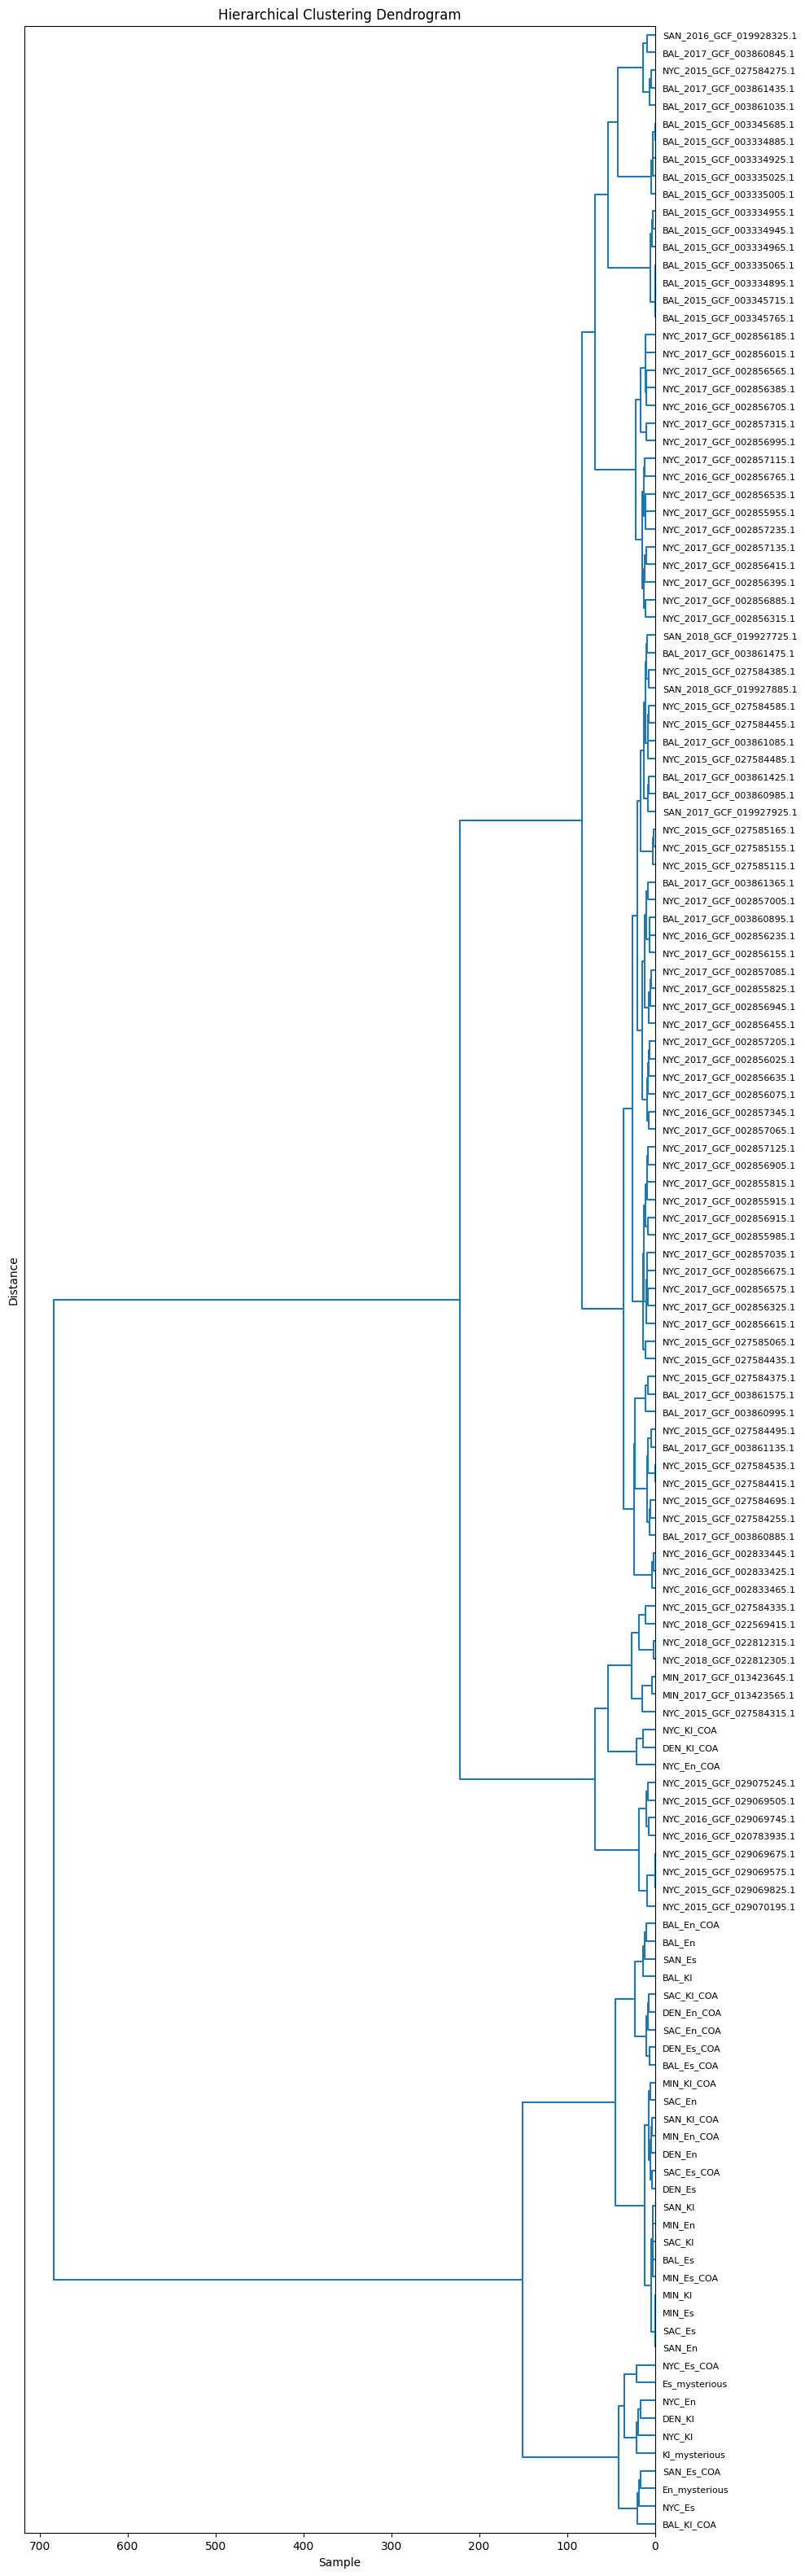

In [6]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming your distance matrix DataFrame is named 'df_dist_matrix'

# Calculate the linkage matrix
linkage_matrix = linkage(df_dist_matrix.values, method='ward')
labels = merged_df['ID'].values

# Plot the dendrogram
plt.figure(figsize=(10, 40))
dendrogram(linkage_matrix, labels=labels, color_threshold=0, orientation='left', leaf_font_size=8)
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Show the plot
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Assuming you have a DataFrame with a column named "number_of_ones"
# df = ...


# Normalize the values in the "number_of_ones" column to be between 0 and 1
normalized_values = (merged_df['count_ones'] - merged_df['count_ones'].min()) / (merged_df['count_ones'].max() - merged_df['count_ones'].min())

# Define the colormap
colormap = cm.Blues

# Map the normalized values to colors using the colormap
colors = [colormap(x) for x in normalized_values]

# Convert the colors to hexadecimal codes
hex_colors = [plt.cm.colors.to_hex(color) for color in colors]

# Add the hexadecimal codes as a new column in the DataFrame
merged_df['count_ones__colour'] = hex_colors


# Get the column names in a list
column_names =  merged_df.columns.tolist()
# Move the "count_ones" column to the second position
column_names.insert(2, column_names.pop(-1))
# Reassign the columns with the new order
merged_df =  merged_df[column_names]

# Export the DataFrame as a CSV file
csv_file_path = '230724_Representants.csv'
merged_df.to_csv(csv_file_path, index=False)
# Print the file paths
print("CSV file saved:", csv_file_path)

CSV file saved: 230724_Representants.csv


In [8]:
#pip install --user matplotlib --upgrade

<ipython-input-9-2465c30ba9a1>:27: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(df_distance.values, method='ward')


Newick string:
(((((((((((NYC_2017_GCF_002855915.1:0.14,NYC_2017_GCF_002855815.1:0.14):0.04,(NYC_2017_GCF_002856915.1:0.11,NYC_2017_GCF_002855985.1:0.11):0.07):0.01,(NYC_2017_GCF_002857125.1:0.12,NYC_2017_GCF_002856905.1:0.12):0.07):0.06,((((NYC_2017_GCF_002856575.1:0.11,NYC_2017_GCF_002856325.1:0.11):0.02,NYC_2017_GCF_002856675.1:0.13):0.02,NYC_2017_GCF_002856615.1:0.15):0.01,NYC_2017_GCF_002857035.1:0.17):0.08):0.07,(NYC_2015_GCF_027585065.1:0.17,NYC_2015_GCF_027584435.1:0.17):0.15):0.15,((((BAL_2017_GCF_003861365.1:0.11,NYC_2017_GCF_002857005.1:0.11):0.04,(BAL_2017_GCF_003860895.1:0.09,NYC_2016_GCF_002856235.1:0.09):0.07):0.04,(((NYC_2017_GCF_002857085.1:0.06,NYC_2017_GCF_002855825.1:0.06):0.04,NYC_2017_GCF_002856945.1:0.10):0.01,(NYC_2017_GCF_002856455.1:0.09,NYC_2017_GCF_002856155.1:0.09):0.01):0.09):0.07,(((NYC_2016_GCF_002857345.1:0.11,NYC_2017_GCF_002857065.1:0.11):0.04,((NYC_2017_GCF_002857205.1:0.10,NYC_2017_GCF_002856025.1:0.10):0.02,NYC_2017_GCF_002856635.1:0.11):0.05):0.02

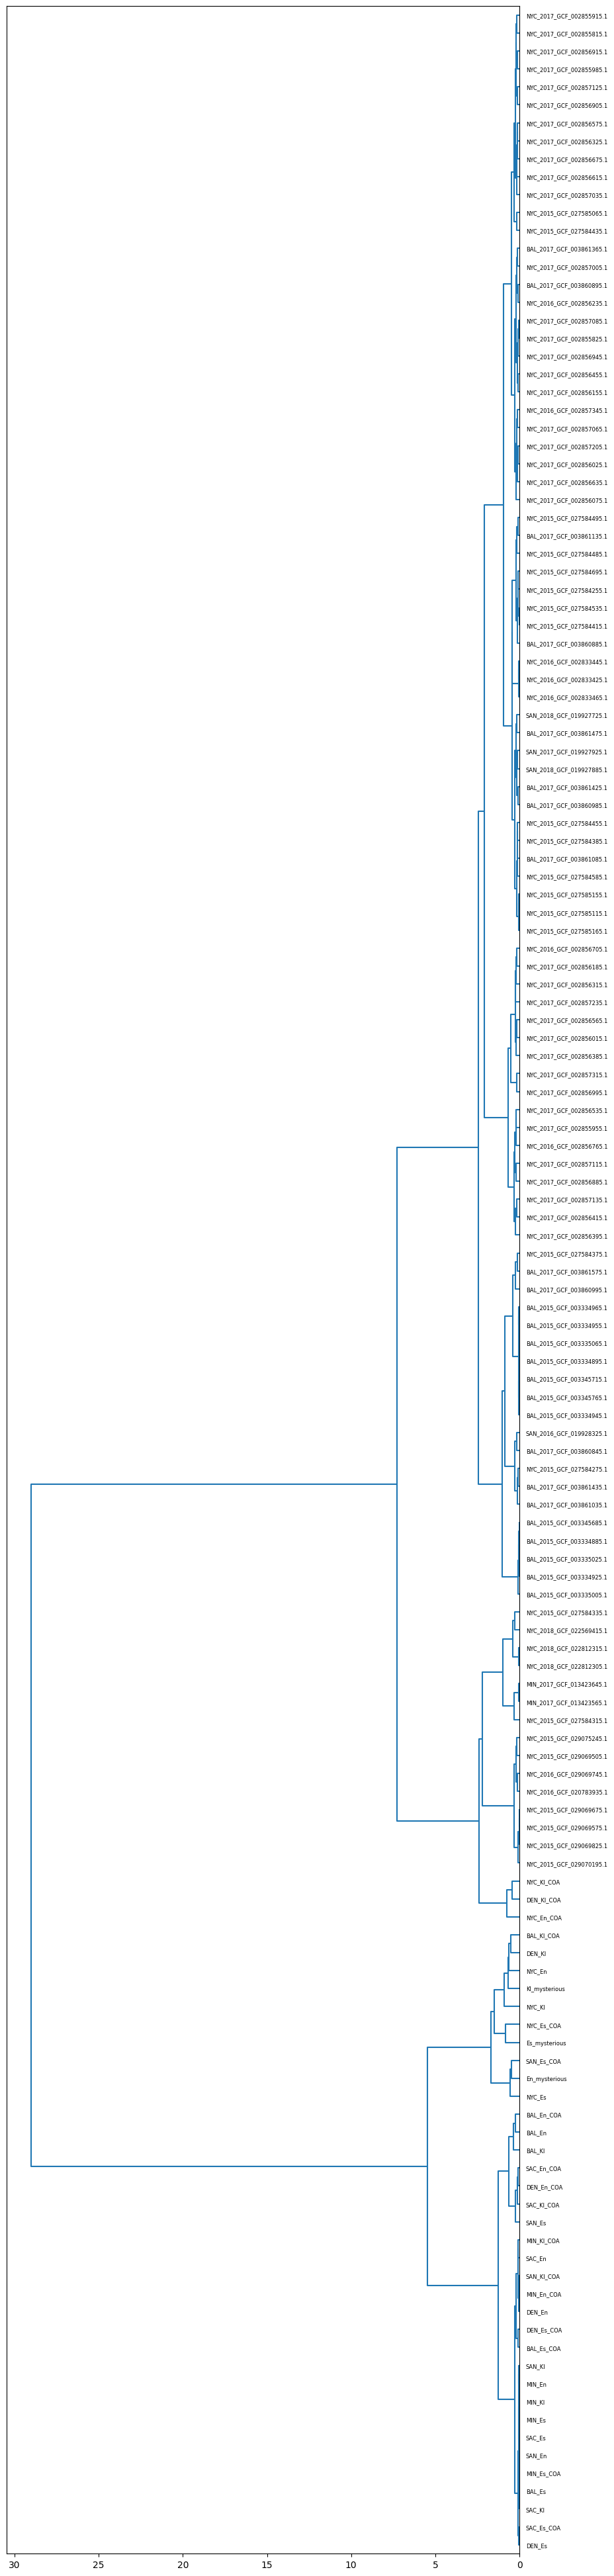

In [9]:
import pandas as pd
import requests
from io import StringIO
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt


# Select the columns of interest
df_data = merged_df.iloc[:, 6:511]
labels = merged_df['ID'].values

# Reset the index of the DataFrame
df_data.reset_index(drop=True, inplace=True)

# Calculate the distance matrix using the rows of the DataFrame
distance_matrix = pdist(df_data.values, metric='hamming')

# Convert the distance matrix to a square matrix
distance_matrix_square = squareform(distance_matrix)

# Create a new DataFrame with the distance matrix
df_distance = pd.DataFrame(distance_matrix_square, index=df_data.index, columns=df_data.index)

# Perform hierarchical clustering on the distance matrix
Z = linkage(df_distance.values, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 50))
dendo = dendrogram(Z, color_threshold=0, labels=labels, leaf_font_size=6, orientation='left', ax=ax)

def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(Z, False)
newick_string=get_newick(tree, tree.dist, labels)

# Print the Newick string
print("Newick string:")
print(newick_string)


# Save Newick string to a file
file_path = '230725_Representants_Newick.nwk'
with open(file_path, 'w') as file:
    file.write(newick_string)
